In [1]:
#import modules and packages
from imutils.perspective import four_point_transform
from imutils import contours
import matplotlib.pyplot as plt
import numpy as np
import imutils
import cv2

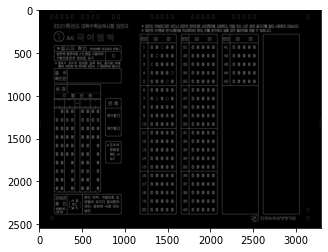

In [2]:
#load the image and preprocess
img=cv2.imread('a.png',cv2.IMREAD_COLOR)
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
canny=cv2.Canny(blurred, 50, 200)
plt.imshow(cv2.cvtColor(canny, cv2.COLOR_BGR2RGB))

In [6]:
#finding contours
cnts=cv2.findContours(canny.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts=imutils.grab_contours(cnts)
cnts=sorted(cnts, key=cv2.contourArea, reverse=True)

[[[2634  279]]

 [[2615 2367]]

 [[3028 2385]]

 [[3044  296]]

 [[2155  279]]

 [[2136 2368]]

 [[2549 2385]]

 [[2565  297]]

 [[1191  280]]

 [[1178 2370]]

 [[1590 2385]]

 [[1606  294]]

 [[1675  279]]

 [[1657 2369]]

 [[2069 2385]]

 [[2085  293]]

 [[ 184  868]]

 [[ 176 2116]]

 [[ 711 2126]]

 [[ 721  876]]]
(20, 1, 2)
int32


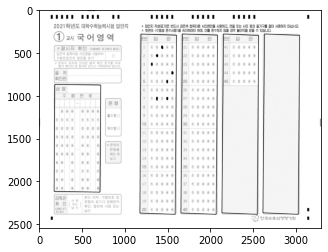

In [8]:
#reducing vertices by approxPolyDP, finding answer area
fa=np.empty((0,1,2), int)
for c in cnts: 
    peri=cv2.arcLength(c, True) 
    approx=cv2.approxPolyDP(c, 0.005*peri, True) 
    if len(approx)==4:
        cv2.drawContours(gray, [approx], 0, (0, 0, 255), 5)
        fa=np.append(fa, approx, axis=0)
print(fa)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))